# Fashion-Mnist Dataset with Tensorflow

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist
from tensorflow_datasets import load

In [29]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [30]:
# ds = load('fashion_mnist',data_dir=r'Documents\tensorflow-datasets', split='train', shuffle_files=True)
# # assert isinstance(ds, tf.data.Dataset)
# print(ds)

In [31]:
train_data.shape, train_labels.shape , test_data.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

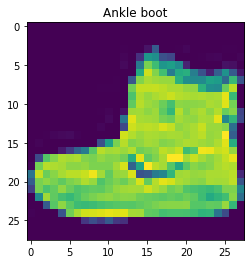

In [33]:
plt.imshow(train_data[0])
plt.title(class_names[train_labels[0]])

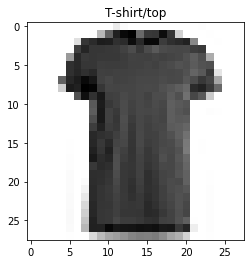

In [34]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

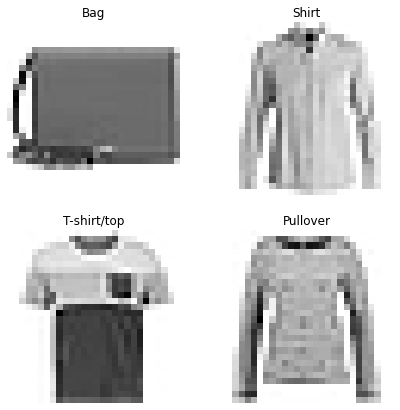

In [35]:

# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [36]:

# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,
                                train_labels,
                                epochs=50,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1595 - accuracy: 0.1630 - val_loss: 1.8121 - val_accuracy: 0.2138
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7001 - accuracy: 0.2530 - val_loss: 1.6497 - val_accuracy: 0.2853
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6252 - accuracy: 0.2843 - val_loss: 1.6026 - val_accuracy: 0.2916
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6016 - accuracy: 0.2903 - val_loss: 1.5929 - val_accuracy: 0.3068
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5829 - accuracy: 0.3030 - val_loss: 1.5754 - val_accuracy: 0.3154
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5676 - accuracy: 0.3153 - val_loss: 1.5407 - val_accuracy: 0.3322
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5244 - accuracy: 0.3510 - val_loss: 1.4987 - val_accuracy:

<AxesSubplot:>

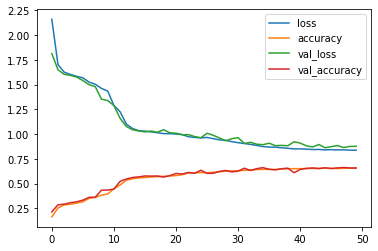

In [37]:
pd.DataFrame(non_norm_history.history).plot()

In [38]:
# Normalizing
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [39]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [41]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

earlyStopping= tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20,mode="min")

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=100,
                            validation_data=(test_data, test_labels),
                            callbacks=[earlyStopping])

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_ac

<AxesSubplot:>

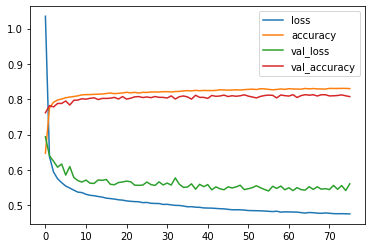

In [42]:
pd.DataFrame(norm_history.history).plot()

In [43]:
# finding optimal learning rate 

# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=50, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])



Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

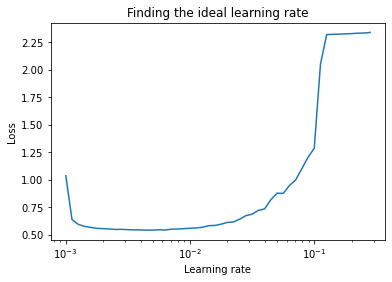

In [44]:
# Plot the learning rate decay curve

lrs = 1e-3 * (10**(np.arange(50)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

# 0.001 seems to be a good fit

In [45]:

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

earlyStopping= tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20,mode="min")

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=100,
                      callbacks=[earlyStopping],
                       validation_data=(test_data, test_labels))

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_ac

<AxesSubplot:>

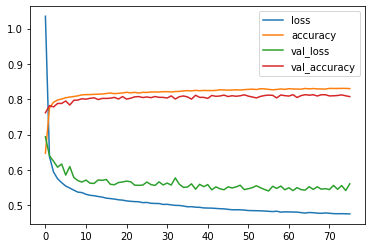

In [46]:
pd.DataFrame(history.history).plot()

In [49]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_15 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

earlyStopping= tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20,mode="min")

# Fit the model
history = model_15.fit(train_data,
                       train_labels,
                       epochs=300,
                      callbacks=[earlyStopping],
                       validation_data=(test_data, test_labels))

Epoch 1/300
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9252 - accuracy: 0.6665 - val_loss: 0.6571 - val_accuracy: 0.7687
Epoch 2/300
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6096 - accuracy: 0.7848 - val_loss: 0.6100 - val_accuracy: 0.7856
Epoch 3/300
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5702 - accuracy: 0.8007 - val_loss: 0.5997 - val_accuracy: 0.7872
Epoch 4/300
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5474 - accuracy: 0.8094 - val_loss: 0.5663 - val_accuracy: 0.8047
Epoch 5/300
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5346 - accuracy: 0.8126 - val_loss: 0.5687 - val_accuracy: 0.8047
Epoch 6/300
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5226 - accuracy: 0.8178 - val_loss: 0.5770 - val_accuracy: 0.7984
Epoch 7/300
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5141 - accuracy: 0.8194 - val_loss: 0.5615 - val_ac

<AxesSubplot:>

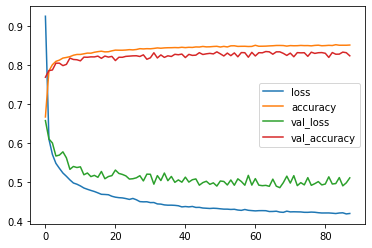

In [50]:
pd.DataFrame(history.history).plot()

In [82]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_16 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dropout(0.15),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dropout(0.15),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_16.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

earlyStopping= tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20,mode="min")

# Fit the model
history = model_16.fit(train_data,
                       train_labels,
                       epochs=300,
                      callbacks=[earlyStopping],
                       validation_data=(test_data, test_labels))

Epoch 1/300
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9463 - accuracy: 0.6372 - val_loss: 0.5674 - val_accuracy: 0.7932
Epoch 2/300
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6673 - accuracy: 0.7451 - val_loss: 0.5309 - val_accuracy: 0.8056
Epoch 3/300
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6184 - accuracy: 0.7678 - val_loss: 0.5111 - val_accuracy: 0.8216
Epoch 4/300
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5925 - accuracy: 0.7789 - val_loss: 0.4868 - val_accuracy: 0.8255
Epoch 5/300
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5729 - accuracy: 0.7868 - val_loss: 0.4889 - val_accuracy: 0.8274
Epoch 6/300
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5604 - accuracy: 0.7908 - val_loss: 0.4981 - val_accuracy: 0.8116
Epoch 7/300
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5498 - accuracy: 0.7967 - val_loss: 0.5058 - val_ac

<AxesSubplot:>

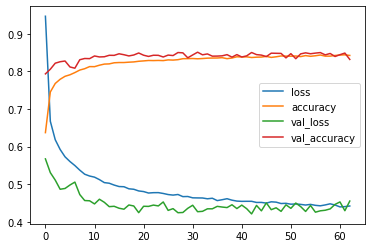

In [83]:
pd.DataFrame(history.history).plot()

In [84]:
preds= np.argmax(model_16.predict(test_data), axis=1)
preds

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

<AxesSubplot:>

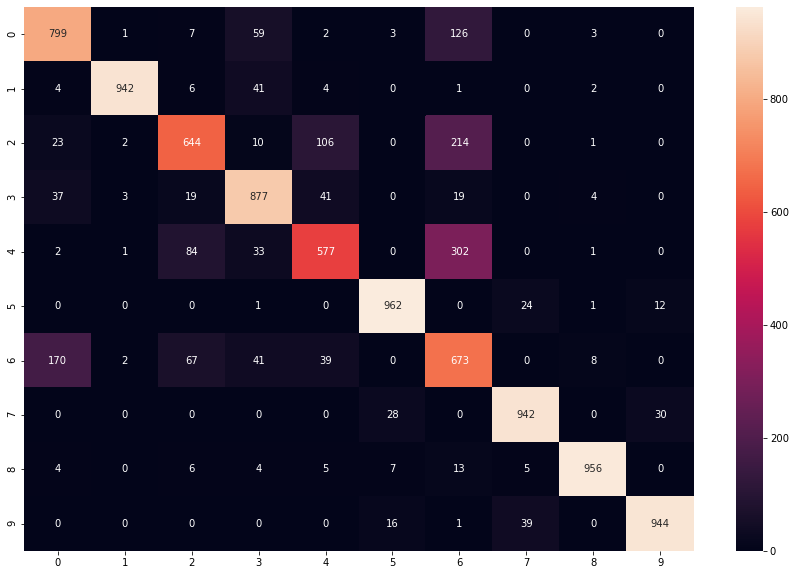

In [85]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(test_labels, preds), annot=True, fmt="d")

In [86]:
accuracy_score(test_labels, preds)

0.8316

In [87]:
model_16.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 16)                12560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_51 (Dense)             (None, 10)              

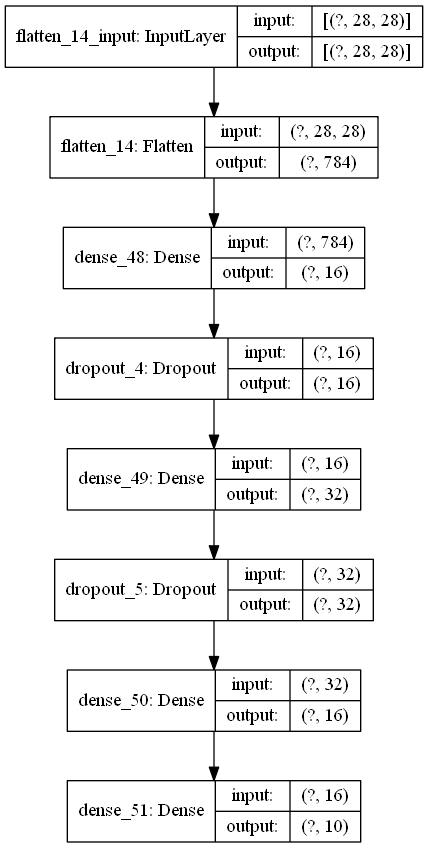

In [88]:
tf.keras.utils.plot_model(model_16, show_layer_names=True, show_shapes=True)